In [35]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from pandas import DataFrame


In [36]:
dados1 = pd.read_excel('previsao_chuva.xlsx')
dados1.head()

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,A401,2018-11-06,8,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,A401,2018-11-06,16,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.0,0.0
2,A401,2018-11-06,4,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,A401,2018-11-06,11,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.0,0.0
4,A401,2018-11-06,2,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0


In [37]:
datas = dados1.data
horas = dados1.hora

In [38]:
concat = []
for e in range(len(datas)):
    #concat.append(datas[e] + ',' + horas[e])
    d = datas[e]
    d = d.replace(hour=horas[e], minute=0, second=0)
    concat.append(d)
    
#print(concat)
dia_hora = pd.Series(concat)

In [39]:
dados1.insert(0,'time', dia_hora, True)

In [40]:
dados1.drop(['data', 'hora'], axis=1)

,time,codigo_estacao,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,2018-11-06 08:00:00,A401,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,2018-11-06 16:00:00,A401,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.00,0.0
2,2018-11-06 04:00:00,A401,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,2018-11-06 11:00:00,A401,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.00,0.0
4,2018-11-06 02:00:00,A401,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0
5,2018-11-06 07:00:00,A401,24.9,25.3,24.8,76,77.0,76.0,20.5,20.8,20.4,1006.3,1006.3,1005.7,1.6,77.0,5.4,NaN,0.0
6,2018-11-06 06:00:00,A401,25.3,25.5,25.1,76,76.0,75.0,20.8,20.9,20.6,1005.7,1006.2,1005.7,1.4,73.0,4.5,NaN,0.0
7,2018-11-06 22:00:00,A401,25.7,25.8,25.5,75,77.0,75.0,20.9,21.3,20.8,1007.3,1007.3,1006.8,1.4,82.0,5.2,NaN,0.0
8,2018-11-06 05:00:00,A401,25.4,25.4,24.7,76,79.0,76.0,20.9,21.1,20.4,1006.2,1006.7,1006.2,1.0,67.0,3.8,NaN,0.0
9,2018-11-06 23:00:00,A401,25.1,25.8,25.1,78,78.0,74.0,21.1,21.2,20.8,1008.4,1008.4,1007.3,1.0,81.0,5.2,NaN,0.0


In [41]:
#dados2 = dados1.groupby(['data']).mean()
#dados2.head()

In [42]:
dados2 = dados1.set_index('time')
dados3 = dados2.transpose()
dados3.head()

time,2018-11-06 08:00:00,2018-11-06 16:00:00,2018-11-06 04:00:00,2018-11-06 11:00:00,2018-11-06 02:00:00,2018-11-06 07:00:00,2018-11-06 06:00:00,2018-11-06 22:00:00,2018-11-06 05:00:00,2018-11-06 23:00:00,...,2019-11-05 11:00:00,2019-11-05 07:00:00,2019-11-05 09:00:00,2019-11-05 12:00:00,2019-11-05 08:00:00,2019-11-05 01:00:00,2019-11-05 02:00:00,2019-11-05 04:00:00,2019-11-05 06:00:00,2019-11-05 03:00:00
codigo_estacao,A401,A401,A401,A401,A401,A401,A401,A401,A401,A401,...,A401,A401,A401,A401,A401,A401,A401,A401,A401,A401
data,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,2018-11-06 00:00:00,...,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00,2019-11-05 00:00:00
hora,8,16,4,11,2,7,6,22,5,23,...,11,7,9,12,8,1,2,4,6,3
temp_inst,24.6,29.9,24.7,27.3,25.1,24.9,25.3,25.7,25.4,25.1,...,27.4,23.6,24.2,27.6,23.3,25.5,25.2,25,24.1,25.2
temp_max,25,31.1,25.2,27.6,25.4,25.3,25.5,25.8,25.4,25.8,...,27.4,24.1,24.2,28.2,23.7,25.8,25.6,25.2,24.6,25.4


In [44]:
dados4 = dados3.loc[['temp_inst', 'pressao','umid_inst', 'precipitacao','radiacao']]
dados5 = dados4.transpose()
dados5.head()

,temp_inst,pressao,umid_inst,precipitacao,radiacao
time,,,,,
2018-11-06 08:00:00,24.6,1006.7,78,0,NaN
2018-11-06 16:00:00,29.9,1006.9,56,0,3389
2018-11-06 04:00:00,24.7,1006.7,77,0,NaN
2018-11-06 11:00:00,27.3,1008.9,66,0,1375
2018-11-06 02:00:00,25.1,1007.6,78,0,NaN


In [45]:
dados6 = dados5[dados5['precipitacao']>0]
dados7 = np.log(dados6)
dados7.plot(figsize=(12, 6),rot=0);

AttributeError: 'float' object has no attribute 'log'

In [50]:
dados8 = dados5[dados5['precipitacao']==0]
dados9 = np.log(dados8)
dados9.plot(figsize=(12, 6),rot=0);

AttributeError: 'float' object has no attribute 'log'

In [47]:
def Grafico2Eixos(listax, labelx,  listay1, labely1, listay2, labely2):
    # Vamos agora plotar os resultados como foi pedido: dois eixos
    # Definicao dos objetos figura e eixo       
    fig, ax1 = plt.subplots()
    # plota a lista 1
    ax1.plot(listax, listay1, 'r')
    # dá nome ao eixo x
    ax1.set_xlabel(labelx)
    # dá nome ao eixo y1
    ax1.set_ylabel(labely1, color='r')
    # seta os limites dos eixos x e y
    # faz a cor das marcas no eixo y1 iguais a linha
    for tl in ax1.get_yticklabels():
        tl.set_color('r')    
    # Cria um eixo com valor de y independente, mas com o mesmo x
    ax2 = ax1.twinx()
    # plota a lista 2
    ax2.plot(listax, listay2, 'g')
    # dá nome ao eixo y2
    ax2.set_ylabel(labely2, color='g')
    # seta os limites dos eixos x e y
    #ax2.axis([0,2, 0, max(S)+.5])
    # faz a cor das marcas no eixo iguais a linha
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    plt.grid(True)
    plt.figure(figsize=(20, 10))
    plt.show()   

/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


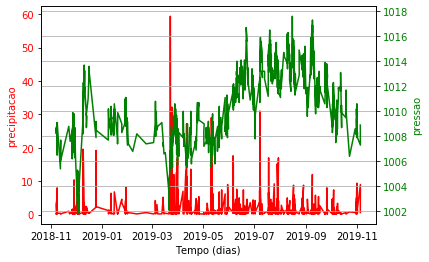

<Figure size 1440x720 with 0 Axes>

In [48]:
tempo = dados6.index
Grafico2Eixos(tempo, 'Tempo (dias)', dados6['precipitacao'],'precipitacao', dados6['pressao'], 'pressao')
